In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots 
plt.style.use(['science', 'notebook', 'grid'])

We will first use a few “toy” examples to show that the band structure can be calculated by solving a matrix eigenvalue equation of the form that we learnt in [[Nano- Part B/Schrodinger Equation|Schrodinger Equation]]
$$E\ket{\psi}=[h(k)]\ket{\psi}$$
where $$h(k)=\sum_{m}[H_{nm}]e^{i\vec{k}\cdot (\vec{d}_{m}-\vec{d}_{n})}$$


# Toy Examples
### 1D tight binding lattice

Let us start with a toy one-dimensional solid composed of $N$ atoms (see Fig. 5.1.1). If we use one orbital per atom we can write down a $(N×N)$ Hamiltonian matrix using one orbital per atom (the off-diagonal element has been labeled with a subscript “ss,”
although the orbitals involved need not necessarily be s orbitals):

$$H=
\begin{array}{c|ccccc}
      & \ket{1} & \ket{2} & \cdots & \ket{N-1} & \ket{N} \\
\hline
\ket{1} & E_0 & E_{ss} & 0 & \cdots & E_{ss} \\
\ket{2} & E_{ss} & E_0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \ddots & \vdots \\
\ket{N-1} & 0 & 0 & \cdots & E_0 & E_{ss} \\
\ket{N} & E_{ss} & 0 & \cdots & E_{ss} & E_0 \\
\end{array}
$$

We have used what is called the periodic boundary condition (PBC), namely, that the Nth atom wraps around and overlaps the first atom as in a ring. This leads to non-zero values for the matrix elements $H_{N,1}$ and $H_{1,N}$ which would normally be zero if the solid were abruptly truncated.

- If we find the eigenvalues numerically we will find that they can all be written in the form ($α$ is an integer)
$$E_{\alpha}=E_{0}+2E_{ss}\cos(k_{\alpha}a)$$
where $$k_{\alpha}=\alpha\frac{ 2\pi}{N}$$
Why is it that we can write down the eigenvalues of this matrix so simply ? The reason is that because of its periodic nature, the matrix equation: $\hat{H}\ket{\psi}=E\ket{\psi}$ consists of set of $N$ equations, all identical in form, as: $$E\psi_{n}=E_{ss}\psi_{n-1}+E_{0}\psi_{n}+E_{ss}\psi_{n+1}$$
This can be solved using Bloch's Theorem:
$$\psi_{n}=\psi_{0}e^{ikna}$$
and we get our dispersion relation.


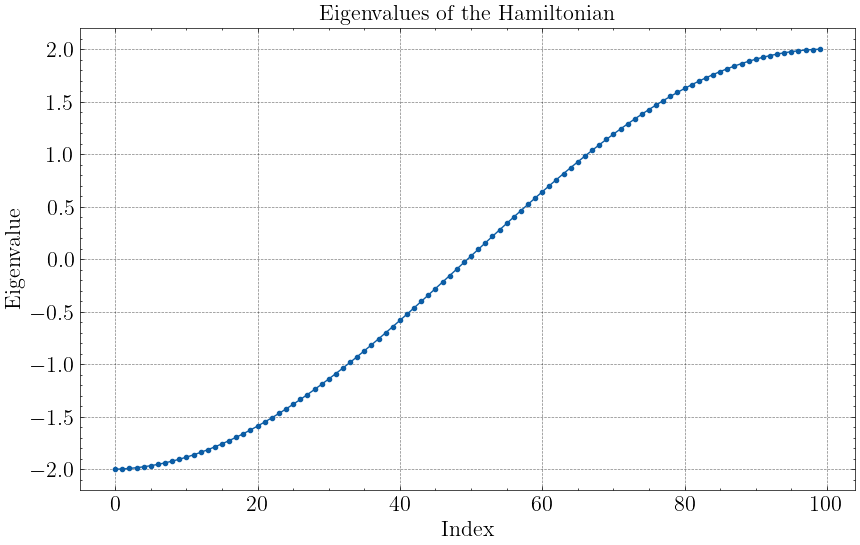

In [52]:
# Defining our Lattice 
N=100
Ess=-1
a=1
E0=0

main_diag=E0*np.ones(N)
off_diag=Ess*np.ones(N-1)
H=np.diag(main_diag) + np.diag(off_diag,1) + np.diag(off_diag,-1)
def Ham(E0,Ess,N):
    """
    Constructs the Hamiltonian matrix for a 1D lattice with nearest-neighbor interactions.
    
    Parameters:
    E0 (float): On-site energy.
    Ess (float): Nearest-neighbor interaction strength.
    N (int): Number of lattice sites.
    
    Returns:
    np.ndarray: Hamiltonian matrix.
    """
    main_diag = E0 * np.ones(N)
    off_diag = Ess * np.ones(N - 1)
    return np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)

# Now we can calculate the eigenvalues and eigenvectors
def eigenval(H):
    """
    Computes the eigenvalues and eigenvectors of the Hamiltonian matrix.
    
    Parameters:
    H (np.ndarray): Hamiltonian matrix.
    
    Returns:
    tuple: Eigenvalues and eigenvectors of the Hamiltonian.
    """
    eigval, eigvec=np.linalg.eigh(H)
    return eigval

H=Ham(0, -1, 100)
eigenvalues = eigenval(H)

# Plotting the eigenvalues
plt.style.use(['science'])
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues, 'o-', ms=3,label='Eigenvalues')
plt.title('Eigenvalues of the Hamiltonian')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)



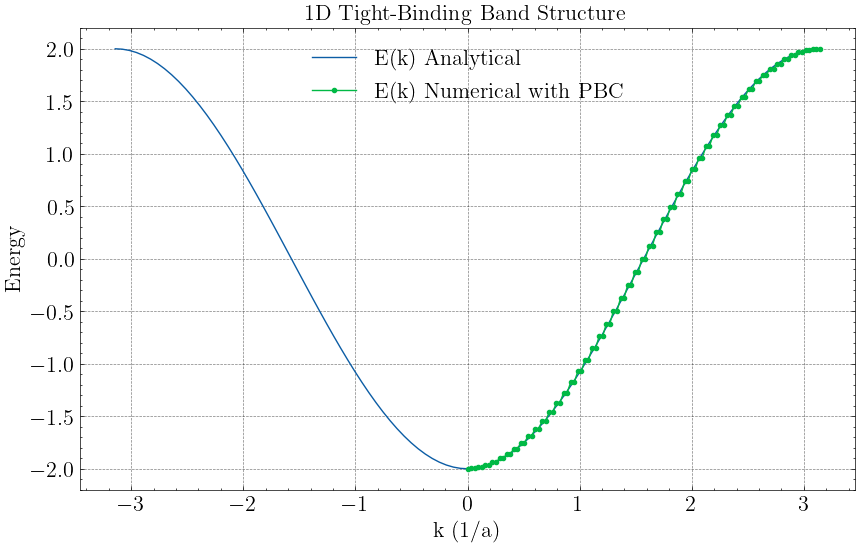

array([[ 0., -1.,  0., ...,  0.,  0., -1.],
       [-1.,  0., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  0., -1.],
       [-1.,  0.,  0., ...,  0., -1.,  0.]])

In [53]:
# Using the Periodic boundary condition, we can plot the E(k) dispersion relation
n_vals=np.arange(-N//2, N//2)
k_vals=(2*np.pi/(N*a))*n_vals
k_vals_sorted=np.sort(k_vals)

E_k_analytical = E0+2 * Ess * np.cos(k_vals_sorted * a)

H_=Ham(0, -1, 100)
H_[0,N-1]=-1
H_[N-1,0]=-1
# Now we can calculate the eigenvalues and eigenvectors for the modified Hamiltonian
eigenvalues_periodic, eigenvectors_periodic = np.linalg.eigh(H_)


plt.style.use(['science'])
plt.figure(figsize=(10, 6))
plt.plot(k_vals_sorted, E_k_analytical, '-', ms=3, label='E(k) Analytical')
plt.plot(np.linspace(0, np.pi/a, N), eigenvalues_periodic, 'o-', ms=3, label='E(k) Numerical with PBC')

plt.xlabel("k (1/a)")
plt.ylabel("Energy")
plt.title("1D Tight-Binding Band Structure")
plt.grid(True)
plt.legend()
plt.show()

H_

Right now we were talking about the $s$ orbitals which had *negative* potential, but the $p$ orbital have different potentials in their lobes, so we have kind of both stuff: $E_{ss}=-1,1$


**When do bands run downwards in $k$?** 

Earlier we have assumed $E_{ss}$ to be negative which is what we would find if we used, say, Eq. (4.1.11c)to evaluate it (note that the potentials $U_L$ or $U_R$ are negative) and the atomic orbitals were $s$ orbitals.

- But if the atomic orbitals are $p_x$ orbitals as shown in Fig. 5.1.3b then the sign of the overlap integral ($E_{ss}$)would be positive and the plot of $E(k)$ would run downwards in $k$ as shown. 
 
- Roughly speaking this is what happens in the valence band of common semiconductors which are formed primarily out of atomic $p$ orbitals.

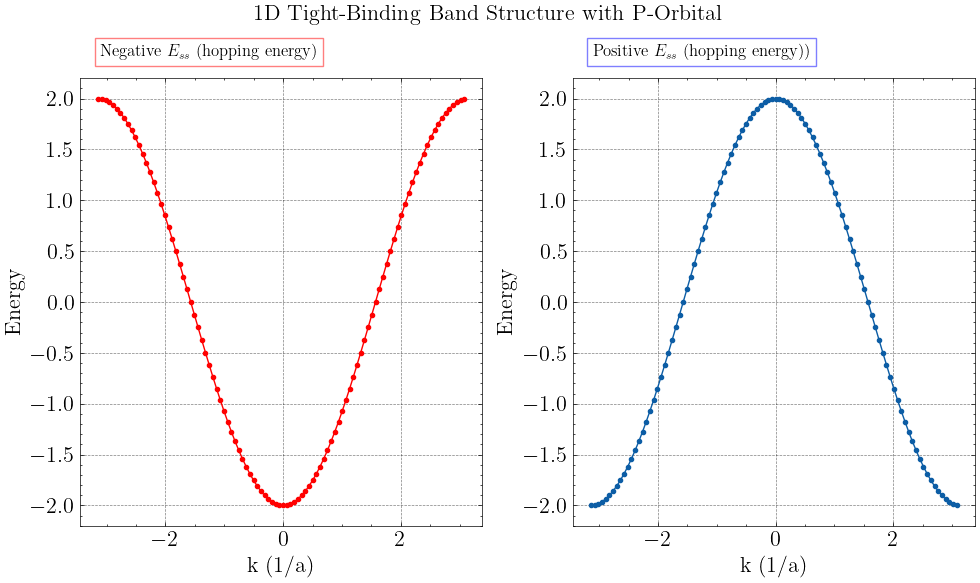

In [89]:
n_vals=np.arange(-N//2, N//2)
k_vals=(2*np.pi/(N*a))*n_vals
k_vals_sorted=np.sort(k_vals)

E_k_analytical = E0+2 * Ess * np.cos(k_vals_sorted * a)
E_k_analytical_ = E0 + 2 * (-Ess) * np.cos(k_vals_sorted * a)   

H_=H.copy()
H_[0,N-1]=Ess
H_[N-1,0]=Ess
# Now we can calculate the eigenvalues and eigenvectors for the modified Hamiltonian
eigenvalues_periodic, eigenvectors_periodic = np.linalg.eigh(H_)


plt.style.use(['science'])

fig, axes = plt.subplots(1, 2, figsize=(10,6))

ax=axes[0]
ax.plot(k_vals_sorted, E_k_analytical, 'ro-', ms=3, )
ax.set_xlabel("k (1/a)")
ax.set_ylabel("Energy")
ax.text(0.05, 1.05, "Negative $E_{ss}$ (hopping energy)", transform=ax.transAxes, 
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='r'),size=12)
ax=axes[1]
ax.plot(k_vals_sorted, E_k_analytical_, 'o-', ms=3,)
ax.set_xlabel("k (1/a)")
ax.set_ylabel("Energy")
ax.text(0.05, 1.05, "Positive $E_{ss}$ (hopping energy))", transform=ax.transAxes, 
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue'),size=12)

fig.suptitle("1D Tight-Binding Band Structure with P-Orbital", size=16)

fig.align_xlabels()

fig.tight_layout()

plt.grid(True)
plt.show()


# Lattice with Basis

Consider next a one-dimensional solid whose unit cell consists of two atoms as shown in Fig. 5.1.4. Actually one-dimensional structures like the one showninFig.5.1.1tend to distort spontaneously into the structure shown in Fig.5.1.4–a
phenomenon known as **Pierel's Distortion**. 

Now lets find the band structure for the solid whose unit cell has more than one type of basis orbital. Using one orbital per atom we can write the matrix representation, of $[H]$ as:


$$
[H] =

\begin{array}{c|ccccccc}
& \ket{1_A} & \ket{1_B} & \ket{2_A} & \ket{2_B} & \ket{3_A} & \ket{3_B} & \cdots \\
\hline
\ket{1_A} & E_0 & E_{ss} & 0 & 0 & 0 & 0 & \cdots \\
\ket{1_B} & E_{ss} & E_0 & E'_{ss} & 0 & 0 & 0 & \cdots \\
\ket{2_A} & 0 & E'_{ss} & E_0 & E_{ss} & 0 & 0 & \cdots \\
\ket{2_B} & 0 & 0 & E_{ss} & E_0 & E'_{ss} & 0 & \cdots \\
\ket{3_A} & 0 & 0 & 0 & E'_{ss} & E_0 & E_{ss} & \cdots \\
\ket{3_B} & 0 & 0 & 0 & 0 & E_{ss} & E_0 & \cdots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots \\
\end{array}

$$

Now we can see here, that we don't have the kind of periodic hamiltonian, as we had earlier, so we can't straight away invoke the Bloch's Theorem. So what we can do is that we block up the hamiltonian as follows:

$$[H]=\begin{array}{c|ccccccc}
& \ket{1} & \ket{2} & \ket{3} \\
\hline
\ket {1}  & H_{11} & H_{12} & 0\\
\ket{2} &  H_{21} & H_{22} & H_{23}\\
\ket{3} & 0 & H_{32} & H_{33}      
\end{array}$$


where $$H_{n,n}=\begin{bmatrix}
E_{0} & E_{ss} \\
E_{ss} & E_{0}
\end{bmatrix}~~~~~H_{n,n+1}=\begin{bmatrix}
0 & 0 \\
E'_{ss} & 0
\end{bmatrix}~~~~~H_{n,n-1}=\begin{bmatrix}
0 & E_{ss} \\
0 & 0
\end{bmatrix}$$
So now we can write the recursive relation as follows: $$E\ket{\psi_{n}}=H_{n,n}\ket{\psi_{n}}+H_{n,n-1}\ket{\psi_{n-1}}+H_{n,n+1}\ket{\psi_{n+1}}    $$
where $$\ket{\psi_{b}}=\begin{bmatrix}
\ket{n_{A}} \\
\ket{n_{B}}  
\end{bmatrix} $$
Now this recursive relation, allows for periodic hamiltonian, and thus we can use Bloch's Theorem.

$$\ket {\psi_{n}}=e^{ikna}\ket{\psi_{0}} $$
Hence we get: $$E\ket{\psi_{0}}=H_{n,n}\ket{\psi_{0}}+H_{n,n-1}~e^{-ika}\ket{\psi_{0}}+H_{n,n+1}~e^{ika}\ket{\psi_{0}}    $$
or $$E\ket{\psi_{0}}=\begin{bmatrix}
E_{0} & E_{ss}+E_{ss}'e^{-ika} \\
E_{ss}+E_{ss}'e^{ika} & E_{0}
\end{bmatrix}\ket{\psi_{0}}  $$
And now we can easily find the eigenvalues:
$$E=E_{0}\pm (E_{ss}^2+{E_{ss}'}^2+2E_{ss}E_{ss}'~\cos (ka))^{1/2 }$$




In [130]:
# Parameters
a=1


def Ham(E0,Ess,Ess_,N):
    """
    Constructs the Hamiltonian matrix for a 1D lattice with nearest-neighbor interactions.
    
    Parameters:
    E0 (float): On-site energy.
    Ess (float): Nearest-neighbor interaction strength.
    Ess_ (float): Second nearest-neighbor interaction strength.
    N (int): Number of lattice sites.
    
    Returns:
    np.ndarray: Hamiltonian matrix.
    """
    k_vals=np.linspace(-np.pi/a, np.pi/a, N)

    E_plus=[]
    E_minus=[]
    for k in k_vals:
        h0=Ess+Ess_*np.exp(-1j*k*a)
        H=np.array([[E0, h0], 
                    [np.conj(h0), E0]])
        eigval, eigvec=np.linalg.eigh(H)
        E_plus.append(eigval[1])
        E_minus.append(eigval[0])

            
    return k_vals, E_plus, E_minus
k_vals1, E_plus1, E_minus1 = Ham(0, -1, -1,10)
k_vals2, E_plus2, E_minus2 =Ham(0,-1,-2,10)
k_vals3, E_plus3, E_minus3 =Ham(1, -1, -4, 10)

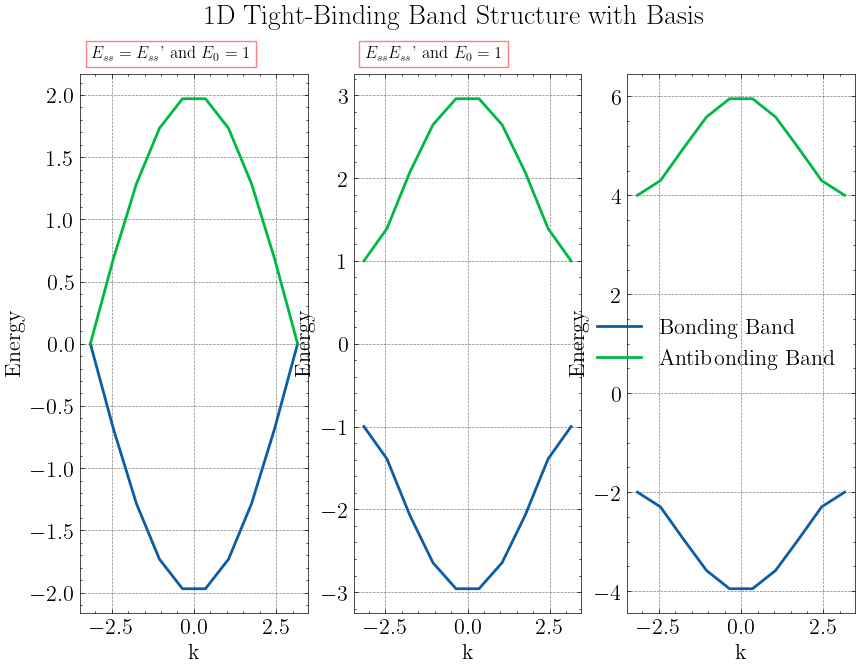

In [145]:
fig,axes=plt.subplots(1,3, figsize=(10,7))
ax=axes[0]
ax.plot(k_vals1, E_minus1, label='Bonding Band', lw=2)
ax.plot(k_vals1, E_plus1, label='Antibonding Band', lw=2)
ax.text(0.05, 1.03, "$E_{ss}=E_{ss}$' and $E_0=1$", transform=ax.transAxes, 
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='r'),size=12)
ax.set_xlabel("k")
ax.set_ylabel("Energy")
ax=axes[1]
ax.plot(k_vals2, E_minus2, label='Bonding Band', lw=2)
ax.plot(k_vals2, E_plus2, label='Antibonding Band', lw=2)
ax.text(0.05, 1.03, "$E_{ss}  E_{ss}$' and $E_0=1$", transform=ax.transAxes, 
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='r'),size=12)
ax.set_xlabel("k")
ax.set_ylabel("Energy")
ax=axes[2]
ax.plot(k_vals3, E_minus3, label='Bonding Band', lw=2)
ax.plot(k_vals3, E_plus3, label='Antibonding Band', lw=2)
ax.set_xlabel("k")
ax.set_ylabel("Energy")
fig.suptitle("1D Tight-Binding Band Structure with Basis", size=20)
plt.grid(True)
plt.legend()
plt.show()
# Ga-As Tight-Binding Model Atom to transistor book